In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import uproot

In [2]:
file = uproot.open("./out.root")

In [4]:
file.classnames()
file["ntp"].keys()

['event_ID',
 'trg_time',
 'event_time',
 'saturated',
 'prev_evt_sat',
 'baseline',
 'waveform_max_time',
 'waveform_max',
 'integral',
 'pretrace_integral',
 'psd',
 'waveform']

In [5]:
file["waveform"].array()

KeyInFileError: not found: 'waveform' (with any cycle number)

    Available keys: 'ntp;1'

in file ./out.root

In [7]:
wf = uproot.open("./out.root:ntp")

In [8]:
wf_array = wf["waveform"].array(library="np")

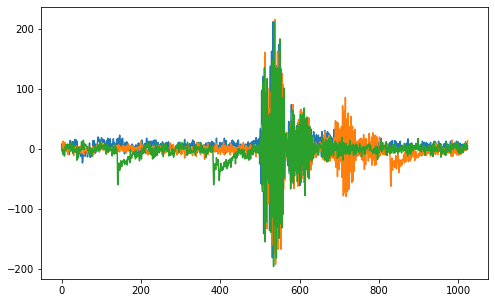

In [24]:
plt.figure(figsize = (8,5))
for i in range(0,3):
    plt.plot(wf_array[i])
# plt.xlim(300,600)    

In [22]:
len(wf_array[i])

1024

In [38]:
integ_ADC = []
for element in wf_array:
    bsl = np.mean(element[0:20])
    array_trace = np.array(np.ones(len(element)))
    for i in range(len(element)):
        array_trace[i] = (-element[i]+bsl)
    integ_ADC.append(sum(array_trace))
    

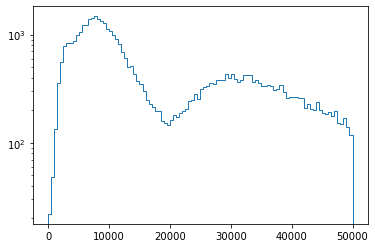

In [46]:
plt.hist(integ_ADC, bins = 100, range = (0,50000), histtype="step");
plt.yscale('log')